In [1]:
from graphviz import Digraph
from mon_viz import viz

class Noeud:
    """
    Un noeud a une valeur et pointe vers deux autres noeuds (petit et
    grand) ou éventuellement le vide.
    On insère de nouvelles valeurs en partant de la racine du noeud et
    en bifurquant selon la comparaison avec la valeur du noeud.

    """

    def __init__(self, val):
        """
        Un noeud a toujours une valeur mais pointe vers un autre noeud
        ou éventuellement le vide (None)
        """
        self.__val = val
        self.__grand = None
        self.__petit = None

    def insere(self, val):
        """
        Permet d'insérer une valeur dans un noeud.
        """
        if val < self.__val:
            if self.__petit:
                self.__petit.insere(val)
            else:
                self.__petit = Noeud(val)
        elif val > self.__val:
            if self.__grand:
                self.__grand.insere(val)
            else:
                self.__grand = Noeud(val)
        else:
            print(f'{val} est un doublon')

    def nb_max_noeuds(self) -> int:
        """
        Nombre max de nœuds sur un chemin de l'arbre
        """
        hb: int = self.__grand.nb_max_noeuds() if self.__grand else 0
        hh: int = self.__petit.nb_max_noeuds() if self.__petit else 0
        return 1 + max(hb, hh)

    def nb_noeuds(self) -> int:
        nb: int = self.__grand.nb_noeuds() if self.__grand else 0
        nh: int = self.__petit.nb_noeuds() if self.__petit else 0
        return 1 + nb + nh

    def est_feuille(self) -> bool:
        return self.__grand is None and self.__petit is None

    def est_unaire(self) -> bool:
        return not ((self.__grand and self.__petit) or self.est_feuille())

    def nb_feuilles(self) -> int:
        if self.est_feuille():
            return 1
        elif self.__petit and not self.__grand:
            return self.__petit.nb_feuilles()
        elif self.__grand and not self.__petit:
            return self.__grand.nb_feuilles()
        elif self.__grand and self.__petit:
            return self.__grand.nb_feuilles() + self.__petit.nb_feuilles()
        else:
            return 0

    def contient(self, v, cpt=0) -> bool:
        val = self.__val
        if v == val:
            print(f'{v} trouvé en {cpt+1} comparaisons')
            return True
        elif v > val and self.__grand:
            return self.__grand.contient(v, cpt+1)
        elif v < val and self.__petit:
            return self.__petit.contient(v, cpt+1)
        else:
            print(f'{v} est absent - Décidé en {cpt+1} comparaisons')
            return False

    def visite_pre(self) -> None:
        print(self.__val)
        for cote in [self.__petit, self.__grand]:
            if cote:
                cote.visite_pre()

    def visite_post(self) -> None:
        for cote in [self.__petit, self.__grand]:
            if cote:
                cote.visite_post()
        print(self.__val)

    def visite_inf(self) -> None:
        if self.__petit:
            self.__petit.visite_inf()
        print(self.__val)
        if self.__grand:
            self.__grand.visite_inf()

    def visite_niveau(self) -> None:
        a_visiter = [self]
        while a_visiter != []:
            noeud = a_visiter[0]
            print(noeud.__val)
            a_visiter = a_visiter[1:]
            if noeud.__petit:
                a_visiter.append(noeud.__petit)
            if noeud.__grand:
                a_visiter.append(noeud.__grand)

    def mini(self):
        if self.__petit is None:
            return self.__val
        else:
            return self.__petit.mini()
        
    def maxi(self):
        if self.__grand is None:
            return self.__val
        else:
            return self.__grand.maxi()
        
    #  Outils de représentation
    
    def gviz(self):
        s = Digraph()
        def tree2viz(self):
            """
            Utilise graphviz pour représenter l'arbre.
            Au besoin, l'installer:
              $ sudo apt-get install graphviz
            Chaque arête est représentée sous la forme:
            père -> fils;
            """
            v = self.__val
            if self.__petit and self.__grand:
                sp = "dotted" if self.__petit.est_feuille() else "filled"  
                sg = "dotted" if self.__grand.est_feuille() else "filled"  
                s.node(f'{self.__petit.__val}', style=sp,fillcolor='cadetblue3')
                s.node(f'{self.__grand.__val}', style=sg,fillcolor='darkorange')
                s.edge(f'{v}', f'{self.__petit.__val}')
                s.edge(f'{v}', f'{self.__grand.__val}')
                tree2viz(self.__petit)
                tree2viz(self.__grand)
            elif self.__petit and not self.__grand:
                sp = "dotted" if self.__petit.est_feuille() else "filled"  
                s.node(f'{self.__petit.__val}', style=sp,fillcolor='cadetblue3')
                s.edge(f'{v}', f'{self.__petit.__val}')
                s.node(f'nullp{v}', shape='point')
                s.edge(f'{v}', f'nullp{v}')
                tree2viz(self.__petit)
            elif self.__grand and not self.__petit:
                sg = "dotted" if self.__grand.est_feuille() else "filled" 
                s.node(f'nullg{v}',shape='point')
                s.edge(f'{v}',f'nullg{v}')
                s.node(f'{self.__grand.__val}',style=sg,fillcolor='darkorange')
                s.edge(f'{v}',f'{self.__grand.__val}')
                tree2viz(self.__grand)
            #else:
            #    s.node(f'nullg{v}',shape='point')
            #    s.edge(f'{v}', f'nullg{v}')
            #    s.node(f'nullp{v}',shape='point')
            #    s.edge(f'{v}', f'nullp{v}')
        tree2viz(self)
        return s

    def affiche(self, graphviz=False):
        """

        """
        if graphviz:
            s = self.gviz()
            s.graph_attr['ordering']='out'
        else:
            s = viz(self, mode="tree")
        return s

    def __str__(self):
        """
        Utilise graph-easy pour afficher les arbres en mode texte.
        Au besoin, installer graph-easy:
          $ sudo apt install cpanminus
          $ sudo cpanm Graph::Easy
        Ensuite on récupère la sortie standard qui est au format binaire
        et on l'encode en utf8 pour l'avoir au format str exigé par repr
        """
        s = self.viz()
        s.graph_attr['ordering']='out'
        cc = 'graph-easy --from=dot --as_ascii arbre.dot'.split()
        res = subprocess.run(cc, stdout=subprocess.PIPE)
        return res.stdout.decode('utf-8')



ModuleNotFoundError: No module named 'mon_viz'

In [2]:
N = Noeud(1);N.insere(2);N.insere(4);N.insere(3);N.insere(10);N.insere(6)

In [3]:
N.nb_max_noeuds()

5

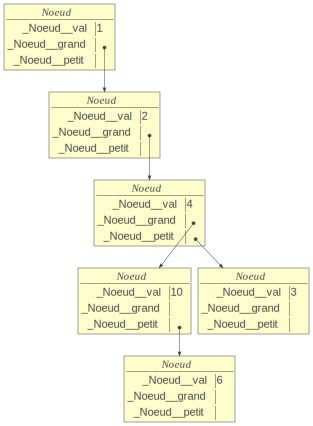

In [4]:
N.affiche()

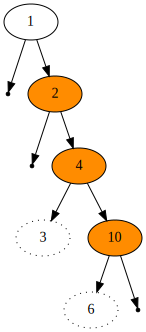

In [5]:
N.affiche(graphviz=True)

In [6]:
class ABR:
    """
    Arbre binaire de recherche constitué de noeuds.
    Reprend les méthodes de la classe Noeud en incluant le cas vide
    et en construisant un arbre à partir d'un noeud.
    """

    def __init__(self) -> None:
        """
        Constructeur : un arbre est vide ou constitué de noeuds
        """
        self.__data = None

    def est_vide(self) -> bool:
        """
        Testeur : vérifie si un arbre est vide
        """
        return self.__data is None

    def insere(self, val) -> None:
        """
        Insère un élément comparable dans un arbre selon le critère
        choisi pour les noeuds.
        Si l'arbre est vide, crée le noeud-data
        """
        if self.__data is None:
            self.__data = Noeud(val)
        else:
            self.__data.insere(val)

    def hauteur(self) -> int:
        if self.__data is None:
            return -1
        else:
            return self.__data.nb_max_noeuds() - 1

    def nb_noeuds(self) -> int:
        if self.__data is None:
            return 0
        else:
            return self.__data.nb_noeuds()

    def est_feuille(self) -> bool:
        if self.__data is None:
            return False
        else:
            return self.__data.est_feuille()

    def nb_feuilles(self) -> int:
        if self.__data is None:
            return 0
        else:
            return self.__data.nb_feuilles()

    def contient(self, v) -> bool:
        if self.__data is None:
            return False
        return self.__data.contient(v)

    def visite_pre(self) -> None:
        if self.__data is not None:
            self.__data.visite_pre()

    def visite_post(self) -> None:
        if self.__data:
            self.__data.visite_post()

    def visite_inf(self) -> None:
        if self.__data is not None:
            self.__data.visite_inf()

    def visite_inf_imp(self) -> None:
        if self.__data is not None:
            self.__data.visite_inf_imp()

    def visite_niveau(self) -> None:
        if self.__data is not None:
            self.__data.visite_niveau()

    def mini(self):
        assert self.__data, 'Arbre vide ! Pas de minimum'
        return self.__data.mini()

    def maxi(self):
        assert self.__data, 'Arbre vide ! Pas de maximum'
        return self.__data.maxi()

    def affiche(self, graphviz=False) -> None:
        assert self.__data, 'Arbre vide'
        if graphviz:
            s = self.__data.affiche(graphviz)
        else:
            s = viz(self, mode="tree")
        return s

    def __str__(self) -> str:
        if self.__data is None:
            return 'Arbre_Vide'
        else:
            return self.__data.__str__()


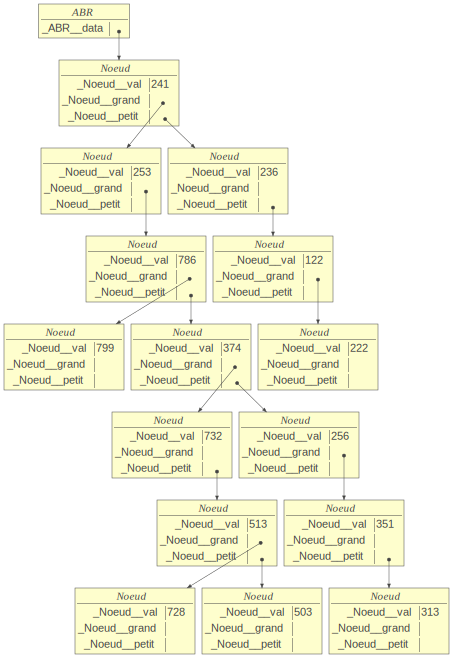

In [7]:
import random

A = ABR()

for k in random.sample(range(100,800), 15):
    A.insere(k)
    
A.affiche()

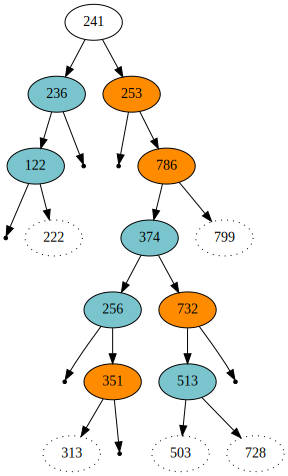

In [8]:
A.affiche(graphviz=True)

In [9]:
A.hauteur()

6

## Recherche de mots dans "Du côté de chez Swann"

In [10]:
from urllib.request import urlretrieve
import re

# on récupère le texte et on l'enregistre sous le nom swann.txt
urlretrieve('https://www.gutenberg.org/files/2650/2650-0.txt', 'swann.txt')
# on ouvre le fichier en lecture seule et on fait attention à l'encodage
fic = open('swann.txt', 'r', encoding = 'utf-8')
# et on le transforme en une longue chaîne de caractères
texte_brut = fic.read()
# on referme le fichier
fic.close()
# pour enlever tout ce qui n'est pas une lettre de l'alphabet:
texte = re.sub('[^A-ZÉÈÀÙÊÔÂÜÛÏÎa-zéèàùêôâüûïî]+', ' ', texte_brut)
# on tranmsforme cette longue chaîne en une liste des mots qu'on suppose séparés par des espaces
liste_Mots = texte.split() 
# pour tout mettre en minuscules :
liste_mots = {mot.lower() for mot in liste_Mots}

# On construit l'arbre de recherche des mots 
sw = ABR()
for mot in liste_mots:
    sw.insere(mot)

In [11]:
sw.hauteur()

33

In [12]:
sw.nb_feuilles()

5245

In [13]:
sw.nb_noeuds()

15712

In [14]:
sw.contient('madeleine')

madeleine trouvé en 16 comparaisons


True

In [15]:
sw.contient('binaire')

binaire est absent - Décidé en 21 comparaisons


False

In [16]:
sw.visite_inf()

a
abaissa
abaissait
abaissant
abaisse
abaisser
abaissée
abaissés
abandon
abandonnai
abandonnait
abandonné
abandonnée
abandonnées
abandonnés
abasourdi
abat
abattu
abattue
abattues
abbatucci
abbé
abbés
abdication
abdiquer
abide
abject
abjecte
abjectes
abjuration
able
aboiements
aboli
abolies
abolirait
abolissait
abolit
abominable
abondamment
abondance
abondant
abonnés
abord
abordai
abordait
aborde
aborder
abordons
abords
abortive
aboucha
about
aboutissait
aboutonnez
abraham
abri
abricots
abrite
abriter
abrégerait
abrégés
abréviation
absence
absences
absent
absentait
absente
absenter
absenterait
absentes
abside
absides
absolu
absolue
absolument
absolution
absolvaient
absorbait
absorbant
absorber
absorberait
absorbèrent
absorbé
absorbée
absorbés
absoudre
abstenait
abstenant
abstenir
abstenu
abstiennent
abstinence
abstrait
abstraite
abstraitement
abstraites
absurde
absurdes
absurdité
abusé
abîme
abîmes
abîmât
abîmée
acabit
acacias
académiciens
académie
acajou
accablait
accablantes
accablant

considerable
considéraient
considérais
considérait
considérant
considérassent
considération
considérations
considérer
considérerait
considéré
considérée
consista
consistait
consistance
consistant
consistants
consiste
consistent
consisterait
consisté
consolait
consolation
consolent
consoler
consolerait
consolerez
consolé
consommait
consommé
consommées
consonnes
conspuer
constamment
constant
constante
constantes
constantin
constantinople
constants
constata
constatable
constatant
constater
constipation
constituait
constituer
constitué
construction
construire
construisant
construisent
construit
construite
construites
consultait
consultant
consultation
consulte
consument
consécration
conséquence
conséquences
conséquent
conséquente
contact
contagion
contagionnées
contain
containing
contempla
contemplais
contemplait
contemplation
contemplent
contemplerait
contemplé
contemplés
contemporain
contemporaine
contenaient
contenait
contenant
contenez
contenir
content
contenta
contentait
contentant
co

formula
formulaient
formule
formuler
formules
formulé
formulées
formèrent
formé
formée
formées
fort
forte
fortes
forth
fortifications
fortifie
fortifier
fortissimo
fortuit
fortuites
fortune
fortunes
forty
forêt
forêts
fosse
fossile
fossés
fou
fouettait
fouetté
fouettée
fougueuse
fougère
fouisseuse
foulais
foulant
foule
fouler
foulèrent
found
foundation
four
fourbe
fourmilière
fourneau
fourni
fournir
fournissait
fournisse
fournisseur
fournisseurs
fourreau
fourrer
fourrure
fourré
fours
fourvoyé
fous
foyer
frac
fragile
fragilité
fragment
fragments
frais
fraise
fraises
fraisier
framboises
fran
franc
france
franche
franchement
franchir
franchise
francillon
francs
frangipane
franque
franquetot
frappa
frappaient
frappais
frappait
frappant
frappe
frapper
frappé
frappés
frayais
frayer
frayeur
frayât
fraîche
fraîches
fraîcheur
fredonnant
fredonnât
free
freely
frein
french
fresque
fresques
frileuse
frileusement
frime
friper
frisa
frise
friser
frises
frisson
frissonnais
frissonnement
frisés
frivol

outrageant
outrageante
outremer
outside
ouvert
ouverte
ouvertement
ouvertes
ouverts
ouverture
ouvrage
ouvrages
ouvragé
ouvraient
ouvrait
ouvrant
ouvre
ouvrent
ouvreuse
ouvrier
ouvriers
ouvrir
ouvris
ouvrit
ouvrière
ouvrons
ouvrît
ouïe
ovale
ovales
ovoïdes
owed
owner
owns
où
pactes
padouan
padoue
pagani
page
pages
paid
paie
paierait
paillasson
paille
pain
paisible
paix
palaces
palais
palancy
paletot
paletots
palette
palier
palimpsestes
palissandre
pallier
palmiers
palmées
palpable
palpait
palpitante
palpitantes
palpitation
palpitations
palpite
palpiter
palpitât
pan
panaches
panier
paniers
panine
panneau
panorama
pansement
paon
papa
papale
paper
paperwork
papeterie
papier
papiers
papillon
papillons
papillotes
papotages
paquet
par
paradis
paragraph
paragraphs
paraissaient
paraissait
paraissent
parallèle
parallèlement
paralysaient
paralysé
paralysée
paralysées
parapluie
parapluies
parasites
paravents
paraît
paraîtraient
paraîtrais
paraîtrait
paraître
parbleu
parc
parce
parcelle
parcelles
p

soudainement
soudains
soudard
soudoyer
souffert
soufflait
soufflant
souffle
souffler
souffles
souffrait
souffrance
souffrances
souffrant
souffrante
souffre
souffrir
souffrons
soufrés
souhaita
souhaitais
souhaitait
souhaitant
souhaite
souhaiter
souhaiterait
souhaits
souhaitât
souhaité
souiller
souillé
soulage
soulagement
soulager
soulagé
soulevait
soulevant
soulever
soulevé
soulevées
soulevés
soulignant
souligner
soumet
soumettant
soumettrait
soumis
soumise
soumission
soup
soupe
souper
soupers
soupesait
soupir
soupira
soupirail
soupirait
soupiraux
souple
souplesse
source
sources
sourcils
sourd
sourde
sourdine
souriais
souriait
souriant
souriante
souriantes
souriants
sourire
sourires
souris
sourit
sournois
sournoise
sournoisement
sous
soustraire
soustrait
soustraite
soutenaient
soutenir
soutenu
soutenue
souterrain
souterraine
soutient
souvenait
souvenant
souvenez
souvenir
souvenirs
souvent
souverain
souveraine
souverains
souviens
souvins
soyeuse
soyez
soyons
spacieux
spartacus
sparterie


waterloo
watteau
way
ways
we
web
website
west
what
whatsoever
when
whenever
where
which
while
who
whom
widespread
widest
will
wish
with
within
without
word
work
works
world
writing
written
www
x
xie
xiie
xiiie
xiv
xive
xixe
xve
xvi
xviie
xviiie
y
yacht
years
yeux
ylie
you
your
zeno
zest
zist
zone
zoologique
zoologiques
zut
zèbres
zèle
zébrée
zélé
zélée
zéphora
à
âge
âges
âgé
âgée
âme
âmes
ât
ère
ève
ébats
ébattre
ébauche
ébauches
éblouir
éblouissait
éblouissant
éblouissante
éblouissement
éborgnait
ébranlant
ébranler
éc
écailles
écailleux
écarlate
écarlates
écarquillés
écart
écarta
écartaient
écartait
écartant
écarte
écartent
écarter
écartions
écarts
écarté
écartée
échancrure
échange
échangeable
échangeraient
échangé
échangés
échantillon
échappa
échappaient
échappait
échappant
échappe
échappent
échapper
échapperait
échappèrent
échappé
échappée
échappées
échec
échelle
échelles
échelons
écheveau
écho
échoppe
échouée
échéance
éclaboussures
éclaboussé
éclair
éclaira
éclairage
éclairaient
éc